In [2]:

import pyscisci.all as pyscisci

import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


%matplotlib inline

In [3]:
# set this path to where the DBLP database will be stored
path2dblp = '/home/ajgates/DBLP'


In [5]:
mydblp = pyscisci.DBLP(path2dblp, database_extension='csv.gz', keep_in_memory=False) 

# set keep_in_memory=False if you want to load the database each time its needed - good for when you 
# cant keep more than one DataFrame in memory at a time

# otherwise keep_in_memory=True will keep each DataFrame in memory after its loaded

In [6]:
# only need to run this for the first time
# usually takes about 1-2min to download
mydblp.download_from_source()

In [7]:
# before we can start running our analysis, we have to preprocess the raw data into
# DataFrames that are more convinent to work with
mydblp.preprocess()

Starting to preprocess the DBLP database.
Xml tree parsed, iterating through elements.


/Users/ajgates/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['Title', 'Number', 'Pages', 'JournalId', 'EE', 'DocType', 'URL'], dtype='object')]

  encoding=encoding,


In [ ]:
# DBLP creates three dataframes:
# pub  - keeps all of the publication information
# columns : ['PublicationId', 'Title', 'Year', 'Month', 'Volume', 'Number', 'Pages', 'JournalId', 'EE', 'DocType', TeamSize']

# author  - keeps all of the author information
# columns : ['AuthorId', 'FullName', 'LastName', 'FirstName', 'MiddleName']

# author2pub  - links the authors to their publications
# columns : ['PublicationId', 'AuthorId', 'AuthorSequence']

# NOTE: DBLP does not contain citation information

/usr/local/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/usr/local/Cellar/graph-tool/2.33/libexec/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/Cellar/graph-tool/2.33/libexec/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/Cellar/graph-tool/2.33/libexec/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`

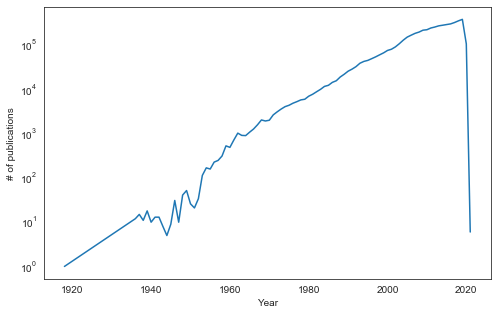

In [4]:
# lets plot the number of publications each year
yearly_articles = pyscisci.groupby_count(df=mydblp.pub , 
                                colgroupby='Year', 
                                colcountby='PublicationId', 
                                count_unique=True)
yearly_articles.sort_values(by='Year', inplace=True)
yearly_articles = yearly_articles.loc[yearly_articles['Year'] > 0]

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.plot(yearly_articles['Year'], yearly_articles['PublicationIdCount'])

ax.set_xlabel('Year')
ax.set_ylabel("# of publications")
ax.set_yscale('log')

plt.show()

/usr/local/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


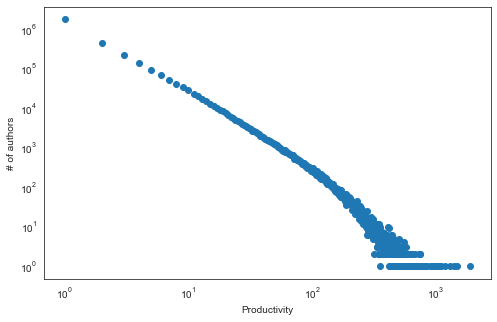

In [10]:
# now we can see the distribution of author productivity 

pa  = mydblp.author2pub  # publication author relationships

author_prod = pyscisci.author_productivity(pa , colgroupby = 'AuthorId', colcountby = 'PublicationId')

prodvalues, prodcounts = np.unique(author_prod['Productivity'].values, return_counts=True)

fig, ax = plt.subplots(1,1,figsize=(8,5))

ax.scatter(prodvalues, prodcounts)

ax.set_xlabel('Productivity')
ax.set_ylabel("# of authors")
ax.set_xscale('log')
ax.set_yscale('log')

plt.show()